In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [5]:
COL = pd.read_csv('../data/MERGED2009_PP.csv')

c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
nonnullcolumns = ~COL.isnull().all()
cols = COL.columns[nonnullcolumns]

In [7]:
COL = COL[cols]

In [8]:
[a for a in cols if 'UG' in a]

['UGDS',
 'UGDS_WHITE',
 'UGDS_BLACK',
 'UGDS_HISP',
 'UGDS_ASIAN',
 'UGDS_AIAN',
 'UGDS_NHPI',
 'UGDS_2MOR',
 'UGDS_NRA',
 'UGDS_UNKN',
 'UGDS_WHITENH',
 'UGDS_BLACKNH',
 'UGDS_API',
 'UGDS_AIANOld',
 'UGDS_HISPOld',
 'PPTUG_EF',
 'PFTFTUG1_EF',
 'UG25abv']

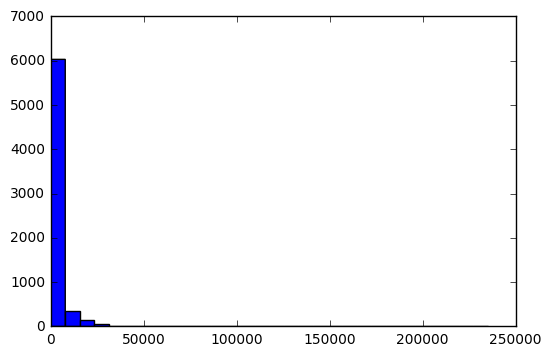

In [9]:
plt.hist(COL['UGDS'].dropna(),bins=30)
plt.show()

In [10]:
[a for a in COL['INSTNM'] if 'davis' in a.lower()]

['Jefferson Davis Community College',
 'University of California-Davis',
 'Davis College',
 'Davis College',
 'Davis Applied Technology College',
 'Davis & Elkins College']

In [11]:
COL = COL.set_index('UNITID')

In [12]:
COL.head()

,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,sch_deg,HCM2,main,NUMBRANCH,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,100200,1002,Alabama A & M University,Normal,AL,35762,3.0,0,1,1,...,0.820627802691,0.463563992652,0.5616,0.583756345178,0.549972987574,0.634844868735,0.606909430439,0.518093556929,0.558441558442,0.569518716578
100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3.0,0,1,1,...,0.906976744186,0.733983286908,0.794761904762,0.799007444169,0.752699228792,0.858083394294,0.802637776731,0.783807829181,0.807363013699,0.804031354983
100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,3.0,0,1,1,...,PrivacySuppressed,0.742307692308,PrivacySuppressed,0.751851851852,0.735751295337,0.793103448276,0.742424242424,0.760273972603,0.783783783784,0.745762711864
100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,3.0,0,1,1,...,0.948717948718,0.789473684211,0.874698795181,0.808098591549,0.820606060606,0.886956521739,0.856760374833,0.84,0.834745762712,0.856429463171
100724,100500,1005,Alabama State University,Montgomery,AL,36101-0271,3.0,0,1,1,...,0.757425742574,0.42458374143,0.487916096671,0.544622425629,0.486777229942,0.556390977444,0.54440433213,0.43867120954,0.485592315902,0.517810599479


In [13]:
davisid = 110644
COL.loc[davisid]

OPEID                                                  131300
opeid6                                                   1313
INSTNM                         University of California-Davis
CITY                                                    Davis
STABBR                                                     CA
ZIP                                                95616-8678
sch_deg                                                     3
HCM2                                                        0
main                                                        1
NUMBRANCH                                                   1
PREDDEG                                                     3
HIGHDEG                                                     4
CONTROL                                                     1
st_fips                                                     6
region                                                      8
ADM_RATE                                               0.5257
ADM_RATE

<h2>plot</h2>

In [15]:
n = len(COL)
t=0
years = ['0' + str(i) for i in range(10)] + [str(i) for i in range(10,14)]
for t in range(len(years)):
    i = years[t]
    COLtemp = pd.read_csv('../data/MERGED20'+i+'_PP.csv')
    COLtemp = COLtemp[COLtemp['sch_deg'] == 3.0][['UNITID','INSTNM','TUITIONFEE_IN','TUITIONFEE_OUT']]
    COLtemp = COLtemp.set_index('UNITID')
    if t==0:
        TUIT = COLtemp
    else:
        TUIT = TUIT.join(COLtemp[['TUITIONFEE_IN','TUITIONFEE_OUT']],how='left',rsuffix=i)

c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,6,442,445,451,455,456,465,480,488,489,490,492,523,546,549,559,562,581,594,597,601,607,610,614,624,633,649,665,667,668,669,670,728,741,747,757,760,763,776,779,789,792,806,809,815,819,822,828,831,832,849,851,852,853,855,856,880,893,910,923,961,965,971,976,978,991,997,1000,1004,1016,1018,1020,1024,1026,1029,1032,1034,1039,1056,1069,1072,1078,1082,1085,1095,1105,1108,1147,1156,1160,1169,1176,1179,1182,1189,1192,1195,1202,1204,1206,1208,1210,1211,1212,1213,1214,1215,1216,1218,1220,1221,1228,1234,1241,1247,1254,1260,1265,1267,1273,1280,1283,1286,1293,1296,1299,1306,1312,1319,1325,1332,1338,1345,1407,1408,1411,1412,1413,1414,1424,1425,1426,1427,1431,1432,1433,1434,1438,1439,1441,1442,1443,1444,1445,1446,1447,1452,1453,1455,1456,1457,1458,1459,1460,1461,1462,1466,1467,1469,1470,1471,1472,1473,1474,1475,1476,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1497,1498,1501,1503,1504,1505,1506,1507,

In [18]:
TUIT.head()

,INSTNM,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_IN01,TUITIONFEE_OUT01,TUITIONFEE_IN02,TUITIONFEE_OUT02,TUITIONFEE_IN03,TUITIONFEE_OUT03,TUITIONFEE_IN04,...,TUITIONFEE_IN08,TUITIONFEE_OUT08,TUITIONFEE_IN09,TUITIONFEE_OUT09,TUITIONFEE_IN10,TUITIONFEE_OUT10,TUITIONFEE_IN11,TUITIONFEE_OUT11,TUITIONFEE_IN12,TUITIONFEE_OUT12
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,ALABAMA A & M UNIVERSITY,4664.0,5200.0,4664.0,5200.0,3040.0,5560.0,3352.0,6184.0,4420.0,...,4072.0,7304.0,4692.0,8638.0,5800.0,10672.0,6828.0,12156.0,7182.0,12774.0
100663,UNIVERSITY OF ALABAMA AT BIRMINGHAM,3363.0,6183.0,3640.0,6610.0,3880.0,7810.0,4274.0,9494.0,4662.0,...,4664.0,10352.0,5096.0,11432.0,5806.0,13198.0,6264.0,14256.0,6798.0,15462.0
100706,UNIVERSITY OF ALABAMA IN HUNTSVILLE,3112.0,6516.0,3536.0,7430.0,3764.0,7940.0,4126.0,8702.0,4516.0,...,5952.0,13092.0,6510.0,15628.0,7492.0,17986.0,8094.0,19424.0,8794.0,21108.0
100724,ALABAMA STATE UNIVERSITY,2520.0,5040.0,2904.0,5808.0,2904.0,5808.0,3600.0,7200.0,4008.0,...,5460.0,10068.0,6468.0,12084.0,7164.0,13476.0,8082.0,14394.0,7932.0,14244.0
100751,UNIVERSITY OF ALABAMA,3014.0,8162.0,3292.0,8912.0,3556.0,9624.0,4134.0,11294.0,4630.0,...,6400.0,18000.0,7000.0,19200.0,7900.0,20500.0,8600.0,21900.0,9200.0,22950.0


In [19]:
TUIT = TUIT.iloc[:,0:27].dropna(axis=0)

In [22]:
TOP = TUIT[COL['UGDS'] > 10000]

c:\python27\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [23]:
TOP.head()

,INSTNM,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_IN01,TUITIONFEE_OUT01,TUITIONFEE_IN02,TUITIONFEE_OUT02,TUITIONFEE_IN03,TUITIONFEE_OUT03,TUITIONFEE_IN04,...,TUITIONFEE_IN08,TUITIONFEE_OUT08,TUITIONFEE_IN09,TUITIONFEE_OUT09,TUITIONFEE_IN10,TUITIONFEE_OUT10,TUITIONFEE_IN11,TUITIONFEE_OUT11,TUITIONFEE_IN12,TUITIONFEE_OUT12
UNITID,,,,,,,,,,,,,,,,,,,,,
100663,UNIVERSITY OF ALABAMA AT BIRMINGHAM,3363.0,6183.0,3640.0,6610.0,3880.0,7810.0,4274.0,9494.0,4662.0,...,4664.0,10352.0,5096.0,11432.0,5806.0,13198.0,6264.0,14256.0,6798.0,15462.0
100751,UNIVERSITY OF ALABAMA,3014.0,8162.0,3292.0,8912.0,3556.0,9624.0,4134.0,11294.0,4630.0,...,6400.0,18000.0,7000.0,19200.0,7900.0,20500.0,8600.0,21900.0,9200.0,22950.0
100858,AUBURN UNIVERSITY MAIN CAMPUS,3050.0,9150.0,3380.0,9900.0,3784.0,11084.0,4426.0,12886.0,4828.0,...,6500.0,18260.0,6972.0,19452.0,7900.0,21916.0,8698.0,23272.0,9446.0,25190.0
102094,UNIVERSITY OF SOUTH ALABAMA,2570.0,4750.0,3230.0,6140.0,3410.0,6500.0,3770.0,7160.0,4290.0,...,5512.0,9922.0,5962.0,11302.0,5748.0,11196.0,6204.0,12108.0,6660.0,13020.0
102368,TROY STATE UNIVERSITY-MAIN CAMPUS,2850.0,5700.0,3296.0,6316.0,3532.0,6752.0,3842.0,7372.0,4162.0,...,4492.0,8740.0,4924.0,9556.0,5860.0,11044.0,6412.0,12052.0,6844.0,12820.0


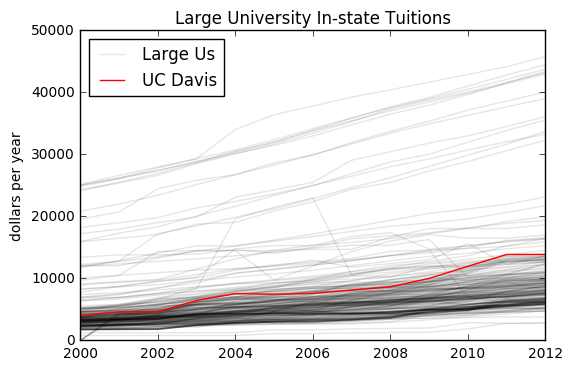

In [24]:
for c in range(len(TOP)):
    if c==0:
        baseplot = plt.plot(['20'+y for y in years[:13]],np.array(TOP.iloc[c,1::2].map(float)),'k',alpha=.1,label="Large Us")
    plt.plot(['20'+y for y in years[:13]],np.array(TOP.iloc[c,1::2].map(float)),'k',alpha=.1)
davis = plt.plot(['20'+y for y in years[:13]],np.array(TOP.loc[davisid].iloc[1::2].map(float)),'r',label="UC Davis")
plt.title('Large University In-state Tuitions')
plt.ylabel('dollars per year')
plt.legend(loc = 2)
plt.show()

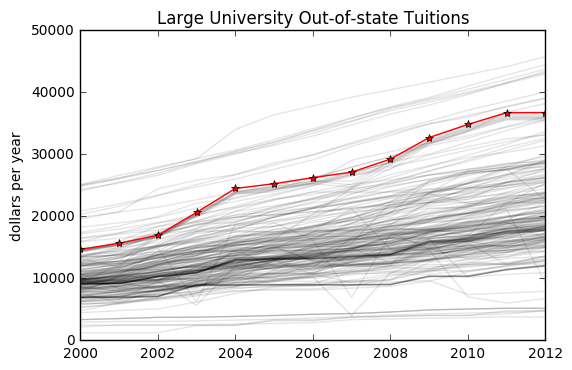

In [25]:
for c in range(len(TOP)):
    plt.plot(['20'+y for y in years[:13]],np.array(TOP.iloc[c,2::2].map(float)),'k',alpha=.1)
plt.plot(['20'+y for y in years[:13]],np.array(TOP.loc[davisid].iloc[2::2].map(float)),'r',marker='*')
plt.title('Large University Out-of-state Tuitions')
plt.ylabel('dollars per year')
plt.show()

<h2>scatter</h2>

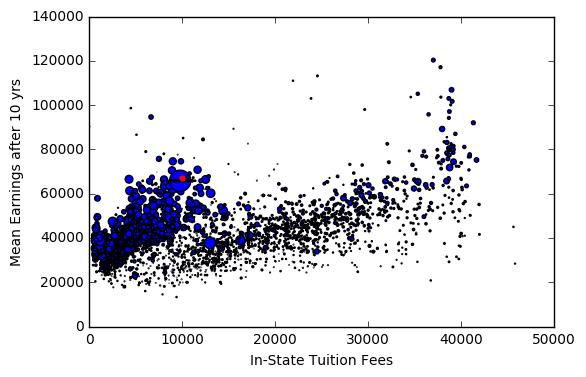

In [27]:
TVE = COL[['UGDS','TUITIONFEE_IN','mn_earn_wne_p10']].dropna(axis=0)
DAV = COL.loc[davisid][['UGDS','TUITIONFEE_IN','mn_earn_wne_p10']]
TVE = TVE[TVE['mn_earn_wne_p10']!='PrivacySuppressed']
plt.scatter(TVE.iloc[:,1],TVE.iloc[:,2],s=TVE.iloc[:,0]/1000)
plt.scatter([DAV[1]],[float(DAV[2])],s=[DAV[0]/2000],c='r',edgecolors='r')
plt.xlim([0,50000])
plt.xlabel('In-State Tuition Fees')
plt.ylabel('Mean Earnings after 10 yrs')
plt.show()

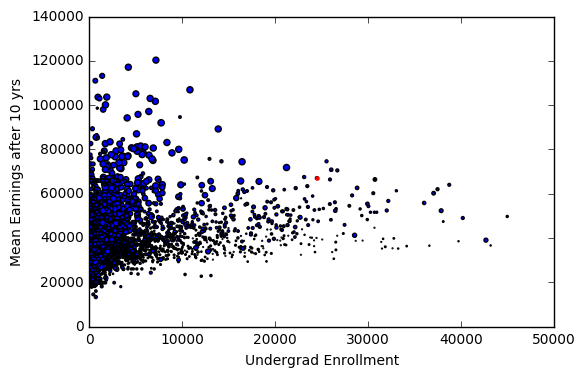

In [28]:
plt.scatter(TVE.iloc[:,0],TVE.iloc[:,2].map(float),s=TVE.iloc[:,1]/2000)
plt.scatter([DAV[0]],[float(DAV[2])],s=[DAV[1]/2000],c='r',edgecolors='r')
plt.xlim([0,50000])
plt.xlabel('Undergrad Enrollment')
plt.ylabel('Mean Earnings after 10 yrs')
plt.show()

In [29]:
COL.loc[davisid][['UGDS','TUITIONFEE_IN','mn_earn_wne_p10']]

UGDS               24496
TUITIONFEE_IN      10003
mn_earn_wne_p10    67000
Name: 110644, dtype: object

<h2>hist</h2>

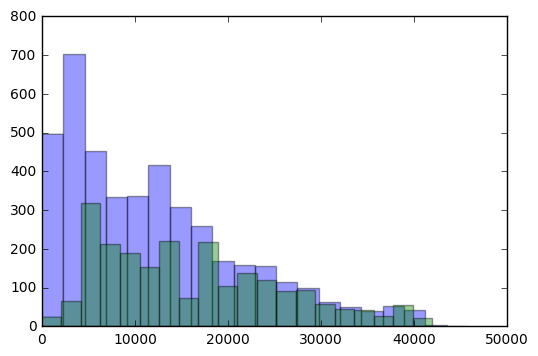

In [302]:
plt.hist(COL['TUITIONFEE_IN'].dropna(),bins=20,alpha=.4)
plt.hist(COL[COL['sch_deg'] == 3.0]['TUITIONFEE_IN'].dropna(),bins=20,alpha=.4)
plt.show()

<h2>bar, pie</h2>

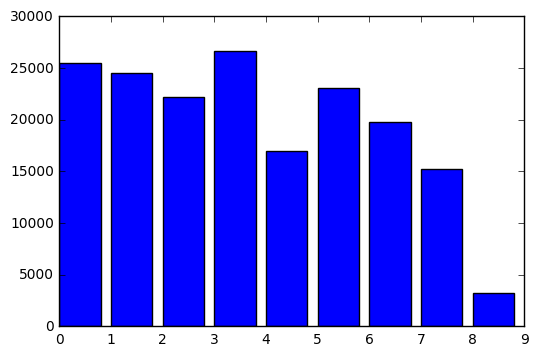

In [341]:
cal = ['university of california-' in a.lower() for a in COL['INSTNM']]
calenroll = COL[cal][['INSTNM','UGDS']].dropna()
plt.bar(range(len(calenroll)),calenroll['UGDS'])
plt.show()

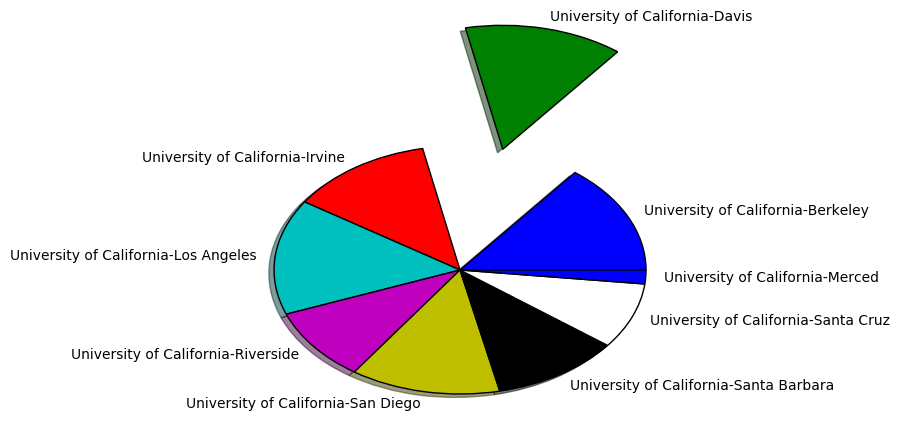

In [332]:
expl = [0]*len(calenroll)
expl[1]=1
plt.pie(calenroll['UGDS'],labels=calenroll['INSTNM'],explode=expl,shadow=True)
plt.show()

<h2>boxplot</h2>

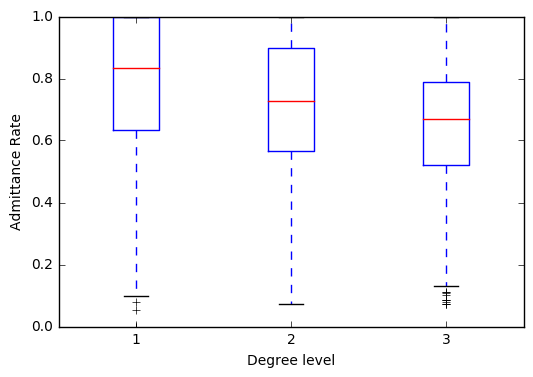

In [358]:
adm = [X['ADM_RATE'].dropna() for deg, X in COL.groupby('sch_deg')]
plt.boxplot(adm)
plt.xlabel('Degree level')
plt.ylabel('Admittance Rate')
plt.show()

In [359]:
COL.loc[davisid]['ADM_RATE']

0.52569999999999995

<h2>Subplots</h2>

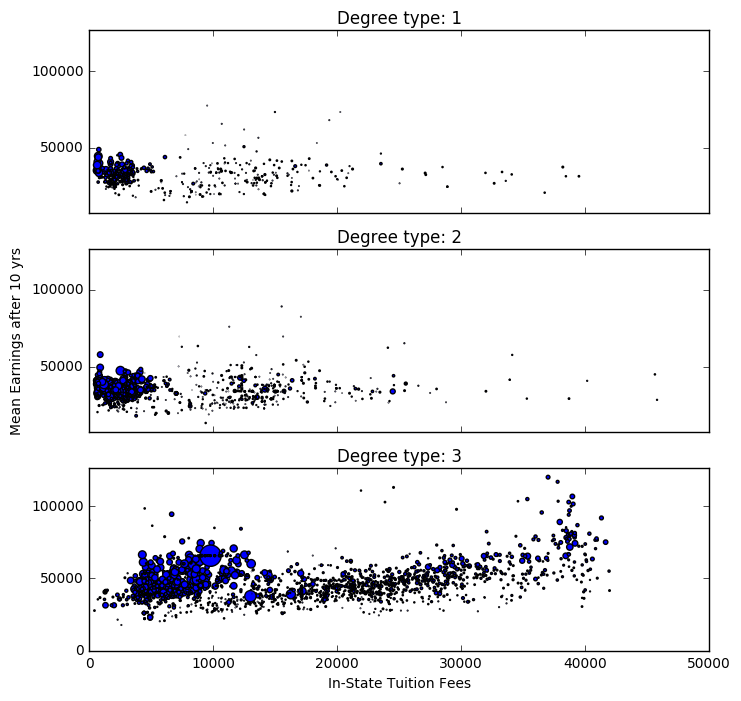

In [60]:
f, axarr = plt.subplots(3, sharex=True, sharey=True, figsize=(8,8))
TVE = COL[['UGDS','TUITIONFEE_IN','mn_earn_wne_p10','sch_deg']].dropna(axis=0)
TVE = TVE[TVE['mn_earn_wne_p10']!='PrivacySuppressed']
for i in range(3):
    TVEt = TVE[TVE['sch_deg'] == i+1]
    axarr[i].scatter(TVEt.iloc[:,1],TVEt.iloc[:,2],s=TVEt.iloc[:,0]/1000)
    axarr[i].set_xlim([0,50000])
    axarr[i].set_yticks([0,50000,100000])
    axarr[i].set_title('Degree type: ' + str(i+1))
    if i == 1:
        axarr[i].set_ylabel('Mean Earnings after 10 yrs')
#f.subplots_adjust(hspace=0)
plt.xlabel('In-State Tuition Fees')
plt.show()